In [ ]:
import platform
platform.architecture()

In [2]:
your_local_path = 'D:/shrikant/Application'

In [ ]:
#source - twitter data analysis https://datascienceplus.com/twitter-analysis-with-python/

In [ ]:
import os
os.environ['PROJ_LIB'] = r'D:/shrikant/Application/anaconda/pkgs/proj4-5.2.0-ha925a31_1/Library/share'

In [3]:
import numpy as np
import pandas as pd
import re
import warnings

In [4]:
#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap #conda install basemap & then set the PROJ_LIB envt variable
from wordcloud import WordCloud, STOPWORDS #pip  install Wordcloud

In [5]:
#nltk - natural language training kit
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
tweets = pd.read_csv('D:/shrikant/Application/tweets_all.csv', encoding = "ISO-8859-1")

In [7]:
tweets.dtypes

Unnamed: 0                     int64
text                          object
retweet_count                  int64
favorited                       bool
truncated                       bool
id_str                         int64
in_reply_to_screen_name       object
source                        object
retweeted                       bool
created_at                    object
in_reply_to_status_id_str    float64
in_reply_to_user_id_str      float64
lang                          object
listed_count                   int64
verified                        bool
location                      object
user_id_str                    int64
description                   object
geo_enabled                     bool
user_created_at               object
statuses_count                 int64
followers_count                int64
favourites_count               int64
protected                       bool
user_url                      object
name                          object
time_zone                     object
u

In [8]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['text'][1]

'Good morning Dina :) Have a terrific hump day! :) Little snowy in Cochrane today.'

In [9]:
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][1]

'good morning dina have a terrific hump day little snowy in cochrane today'

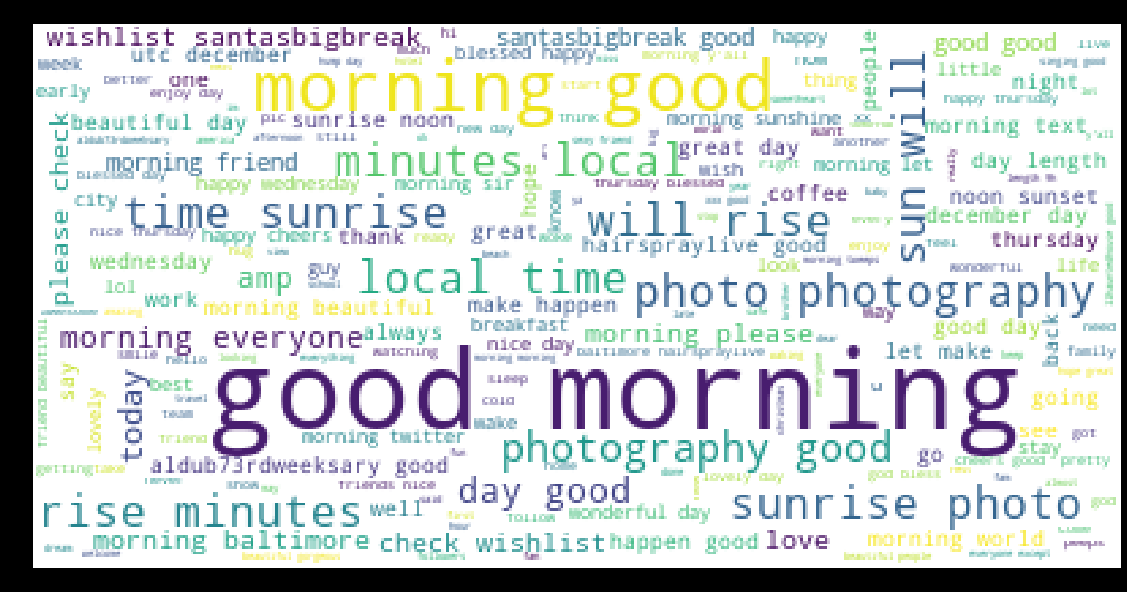

In [10]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
wordcloud(tweets,'text')

In [ ]:
tweets['country'] = tweets['country'].apply(lambda x: x.lower())
tweets['country'].replace('states united','united states',inplace=True)
tweets['country'].replace('united states','usa',inplace=True)
tweets['country'].replace('united Kingdom','uk',inplace=True)
tweets['country'].replace('republic philippines','philippines republic',inplace=True)
wordcloud(tweets, 'country')

In [ ]:
tweets['source'][2]
#tweets.head()

In [12]:
from bs4 import BeautifulSoup 
#added from
#https://stackoverflow.com/questions/3662142/how-to-remove-tags-from-a-string-in-python-using-regular-expressions-not-in-ht

tweets['source_new'] = ''

for i in range(len(tweets['source'])):
    #m = re.search('(?<=>)(.*>)', tweets['source'][i])
    m=BeautifulSoup(tweets['source'][i]) #added instead of above
    #print(m.get_text())
    try:
        #tweets['source_new'][i]=m.group(0)
        tweets['source_new'][i]=m.get_text() #added instead of above
    except AttributeError:
        tweets['source_new'][i]=tweets['source'][i]
        
tweets['source_new'] = tweets['source_new'].str.replace('', ' ', case=False)

In [13]:
tweets['source_new'].head()

0                         I n s t a g r a m 
1     T w i t t e r   f o r   A n d r o i d 
2     T w i t t e r   f o r   A n d r o i d 
3     T w i t t e r   f o r   A n d r o i d 
4       T w i t t e r   W e b   C l i e n t 
Name: source_new, dtype: object

In [ ]:
tweets_by_type = tweets.groupby(['source_new'])['followers_count'].sum()
plt.title('Number of followers by Source', bbox={'facecolor':'0.8', 'pad':0})
tweets_by_type.transpose().plot(kind='bar',figsize=(20, 10))

In [ ]:
tweets['source_new2'] = ''

for i in range(len(tweets['source_new'])):
    if tweets['source_new'][i] not in ['Twitter for Android','Instagram','Twitter Web Client','Twitter for iPhone']:
        tweets['source_new2'][i] = 'Others'
    else:
        tweets['source_new2'][i] = tweets['source_new'][i] 

tweets_by_type2 = tweets.groupby(['source_new2'])['followers_count'].sum()
tweets_by_type2.rename("",inplace=True)
explode = (1, 0, 0, 0, 0)
tweets_by_type2.transpose().plot(kind='pie',figsize=(20, 15),autopct='%1.1f%%',shadow=True,explode = explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of followers by Source bis', bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
plt.figure( figsize=(20,10), facecolor='k')
m = Basemap(projection='mill',resolution=None,llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.etopo()
xpt,ypt = m(np.array(tweets['place_lon']),np.array(tweets['place_lat']))
lon,lat = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'ro',markersize=np.sqrt(5)) 
plt.title('Repartition on the globbe', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())

sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

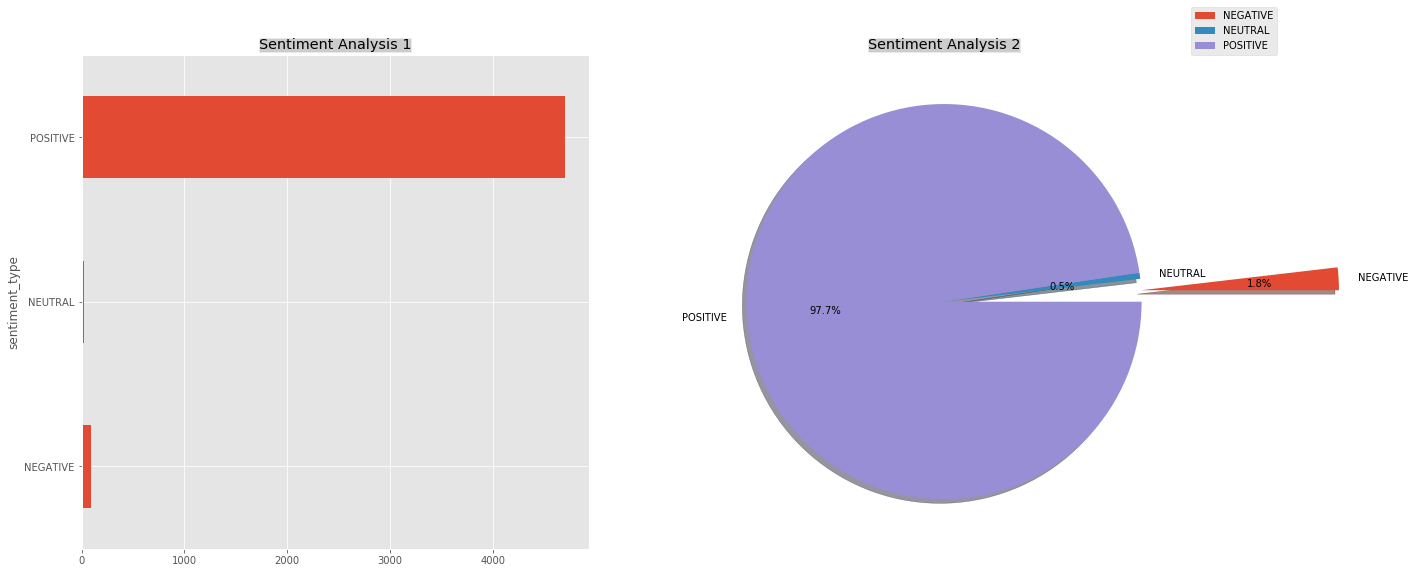

In [21]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [23]:
tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)[0:9]

0    good morning it's time for pastries almond and...
1                                   good morning bitch
2    not a good look when you take a study break to...
3    good morning niece/ it's been awhile- miss you...
4                   good morning from hell that is all
5    was going to go to the gym this morning but my...
6         hello good morning i'm terrified how are you
7     good morning tho y'all don't be rude say it back
8    good morning ramnation it's gameday havoc retu...
Name: text, dtype: object